In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#IMPORTING DATASET
advertising = pd.read_csv("Advertising.csv")

In [3]:
advertising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


<AxesSubplot:>

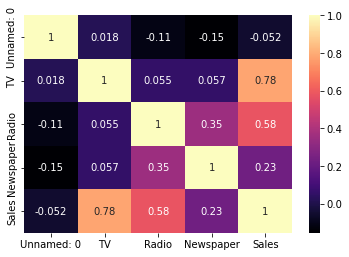

In [4]:
#HEATMAP FOR CORRELATION
sns.heatmap(advertising.corr(),cmap='magma',annot=True)

# FOR TV ONLY

In [5]:
X = advertising['TV']
y = advertising['Sales']

In [6]:
from sklearn.model_selection import train_test_split

X_train_tv,X_test_tv,y_train_tv,y_test_tv = train_test_split(X,y,test_size=0.3,random_state=5)

In [7]:
X_train_tv

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 140, dtype: float64

In [8]:
#FOR SINGLE FEATURE WE MUST RESHAPE IT
X_train_tv = X_train_tv.values.reshape(-1,1)
X_test_tv = X_test_tv.values.reshape(-1,1)

In [9]:
#IMPORTING GRADIENT DESCENT MODEL
from sklearn.linear_model import LinearRegression

In [10]:
#INSTANTIATING OUR MODEL
lr_model = LinearRegression()

In [11]:
#FITTING TRAINING DATA TO OUR MODEL
lr_model.fit(X_train_tv,y_train_tv)

LinearRegression()

In [12]:
#INTERCEPT VALUE---C
print(lr_model.intercept_)

6.745302251222066


In [13]:
#CONSTANT OR SLOPE ---- M
print(lr_model.coef_)

[0.05024351]


In [14]:
#PREDICTIONS FOR TRAINING SET
pred_train = lr_model.predict(X_train_tv)

In [15]:
#TRAINING SET RESIDUAL
train_error = y_train_tv - pred_train

In [16]:
train_error

170   -0.857478
182   -0.868988
59     1.068389
185    5.554777
12     1.258902
         ...   
73    -2.246813
144   -0.178728
118    2.839088
189   -0.984856
99     3.661775
Name: Sales, Length: 140, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

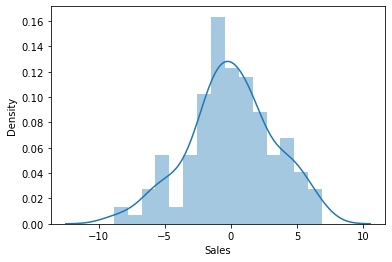

In [17]:
sns.distplot(train_error,bins=15)

In [18]:
# R-SQUARED SCORE FOR TRAINING SET
from sklearn.metrics import r2_score

In [48]:
r_sq_train_tv = r2_score(y_train_tv,pred_train)
print(r_sq_train_tv)

0.6411433688483876


In [20]:
#RMSE
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train_tv,pred_train)

print(mse_train)

rmse_train = np.sqrt(mse_train)
print(rmse_train)

10.47402465891117
3.23635978514614


In [21]:
#PREDICTION FOR TEST SET
pred_test = lr_model.predict(X_test_tv)

In [47]:
#R-SQUARE FOR TESTING SET 
r_sq_test_tv = r2_score(y_test_tv,pred_test)
print(r_sq_test_tv)

0.5111616978794155


In [24]:
#RMSE FOR TESTING SET
rmse_test = np.sqrt(mean_squared_error(y_test_tv,pred_test))
print(rmse_test)

3.2898003457568414


In [50]:
#ADJUSTED R-SQUARE

adj_rsq_train_tv = 1-((1-r_sq_train_tv)*((len(y_train_tv)-1)/(len(y_train_tv)- (X_train_tv.shape[1]) - 1))) 
print(f"Adjusted R-SQUARE FOR TRAINING FOR TV ONLY = {adj_rsq_train_tv}")

adj_rsq_test_tv = 1-((1-r_sq_test_tv)*((len(y_test_tv)-1)/(len(y_test_tv)- (X_test_tv.shape[1]) - 1)))
print(f"Adjusted R-SQUARE FOR Testing FOR TV ONLY = {adj_rsq_test_tv}")



Adjusted R-SQUARE FOR TRAINING FOR TV ONLY = 0.6385429584777238
Adjusted R-SQUARE FOR Testing FOR TV ONLY = 0.5027334512911296


In [51]:
df = pd.DataFrame({'TV ONLY':[0.6411433688483876,0.5111616978794155,
                              3.23635978514614,3.2898003457568414,6.745302251222066,0.05024351,0.6385429584777238,\
                              0.5027334512911296]},
                  index = ['R-SQUARE TRAINING','R-SQUARE TESTING','RMSE TRAINING','RMSE TESTING','INTERCEPT','SLOPE'
                          ,'ADJUSTED R-SQUARE TRAINING','ADJUSTED R-SQUARE TESTING'])
df

,TV ONLY
R-SQUARE TRAINING,0.641143
R-SQUARE TESTING,0.511162
RMSE TRAINING,3.236360
RMSE TESTING,3.289800
INTERCEPT,6.745302
SLOPE,0.050244
ADJUSTED R-SQUARE TRAINING,0.638543
ADJUSTED R-SQUARE TESTING,0.502733


# FOR TV AND RADIO

In [27]:
X = advertising[['TV','Radio']]
y = advertising['Sales']

In [28]:
X_train_tr,X_test_tr,y_train_tr,y_test_tr = train_test_split(X,y,test_size=0.3,random_state=5)

In [29]:
X_train_tr.head(2)

,TV,Radio
170,50.0,11.6
182,56.2,5.7


In [30]:
#INSTANTIATING OUR MODEL
lr_model_tr = LinearRegression()

In [31]:
#FITTING TRAINING DATA TO OUR MODEL
lr_model_tr.fit(X_train_tr,y_train_tr)


LinearRegression()

In [32]:
#INTERCEPT AND SLOPE VALUES
print(f" c = {lr_model_tr.intercept_}, m = {lr_model_tr.coef_}")

 c = 2.951573488420264, m = [0.04667388 0.18424872]


In [33]:
# PREDICTION VALUES

pred_train_tr = lr_model_tr.predict(X_train_tr)
pred_test_tr = lr_model_tr.predict(X_test_tr)

In [34]:
# R-SQUARED VALUES

r_sq_train_tr = r2_score(y_train_tr,pred_train_tr)
r_sq_test_tr = r2_score(y_test_tr,pred_test_tr)

print(r_sq_train_tr)
print(r_sq_test_tr)

0.8997316645428147
0.8869404796279678


In [35]:
#ADJUSTED R_SQUARED VALUES

adj_rsq_train_tr = 1-((1-r_sq_train_tr)*((len(y_train_tr)-1)/(len(y_train_tr)- (X_train_tr.shape[1]) - 1)))
print(adj_rsq_train_tr)

adj_rsq_test_tr = 1-((1-r_sq_test_tr)*((len(y_test_tr)-1)/(len(y_test_tr)- (X_test_tr.shape[1]) - 1)))
print(adj_rsq_test_tr)

0.8982678932222719
0.8829734789131597


In [36]:
#RMSE VALUES

rmse_train_tr = np.sqrt(mean_squared_error(y_train_tr,pred_train_tr))
rmse_test_tr = np.sqrt(mean_squared_error(y_test_tr,pred_test_tr))

print(rmse_train_tr)
print(rmse_test_tr)

1.7107171561750043
1.5821239241271168


# FOR TV , RADIO , NEWSPAPER

In [37]:
X = advertising[['TV','Radio','Newspaper']]
y = advertising['Sales']

In [38]:
X_train_trn,X_test_trn,y_train_trn,y_test_trn = train_test_split(X,y,test_size=0.3,random_state=5)

In [39]:
X_train_trn.head(2)

,TV,Radio,Newspaper
170,50.0,11.6,18.4
182,56.2,5.7,29.7


In [40]:
#INSTANTIATING OUR MODEL
lr_model_trn = LinearRegression()

In [41]:
#FITTING TRAINING DATA TO OUR MODEL
lr_model_trn.fit(X_train_trn,y_train_trn)


LinearRegression()

In [42]:
#INTERCEPT AND SLOPE VALUES
print(f" c = {lr_model_trn.intercept_}, m = {lr_model_trn.coef_}")

 c = 2.9787673054549177, m = [ 0.04668512  0.18501553 -0.00153043]


In [43]:
# PREDICTION VALUES

pred_train_trn = lr_model_trn.predict(X_train_trn)
pred_test_trn = lr_model_trn.predict(X_test_trn)

In [44]:
# R-SQUARED VALUES

r_sq_train_trn = r2_score(y_train_trn,pred_train_trn)
r_sq_test_trn = r2_score(y_test_trn,pred_test_trn)

print(r_sq_train_trn)
print(r_sq_test_trn)

0.8997682984995
0.8868821951328665


In [75]:
#ADJUSTED R_SQUARED VALUES
adj_rsq_train_trn = 1-((1-r_sq_train_trn)*((len(y_train_trn)-1)/(len(y_train_trn)- (X_train_trn.shape[1]) - 1))) 
print(f"Adjusted R-SQUARE FOR TRAINING FOR TV ,RADIO,NEWSPAPER ONLY = {adj_rsq_train_trn}")

adj_rsq_test_trn = 1-((1-r_sq_test_trn)*((len(y_test_trn)-1)/(len(y_test_trn)- (X_test_trn.shape[1]) - 1)))
print(f"Adjusted R-SQUARE FOR Testing FOR TV,RADIO,NEWSPAPER ONLY = {adj_rsq_test_trn}")


Adjusted R-SQUARE FOR TRAINING FOR TV ,RADIO,NEWSPAPER ONLY = 0.8975573050840479
Adjusted R-SQUARE FOR Testing FOR TV,RADIO,NEWSPAPER ONLY = 0.88082231272927


In [46]:
#RMSE VALUES

rmse_train_trn = np.sqrt(mean_squared_error(y_train_trn,pred_train_trn))
rmse_test_trn = np.sqrt(mean_squared_error(y_test_trn,pred_test_trn))

print(rmse_train_trn)
print(rmse_test_trn)

1.710404614517381
1.5825316802028755


# ONLY RADIO

In [56]:
X = advertising['Radio']
y = advertising['Sales']

In [57]:
# TRAIN TEST SPLIT 70-30 RATIO
from sklearn.model_selection import train_test_split

X_train_r,X_test_r,y_train_r,y_test_r = train_test_split(X,y,test_size=0.3,random_state=5)

In [58]:
# RESHAPING FOR ONLY ONE FEATURE
X_train_r = X_train_r.values.reshape(-1,1)
X_test_r = X_test_r.values.reshape(-1,1)


In [62]:
# INSTANTIATING MODEL
lr_model_r = LinearRegression()

In [63]:
# FITTING TRAINING DATA TO OUR MODEL
lr_model_r.fit(X_train_r,y_train_r)

LinearRegression()

In [64]:
#INTERCEPT AND SLOPE VALUES
print(f" c = {lr_model_r.intercept_}, m = {lr_model_r.coef_}")

 c = 8.947238531088827, m = [0.21402617]


In [65]:
# PREDICTION VALUES
pred_train_r = lr_model_r.predict(X_train_r)
pred_test_r = lr_model_r.predict(X_test_r)

In [66]:
# R-SQUARED VALUES
r_sq_train_r = r2_score(y_train_r,pred_train_r)
print(f"R-SQUARE FOR TRAINING SET FOR ONLY RADIO = {r_sq_train_r}")

r_sq_test_r = r2_score(y_test_r,pred_test_r)
print(f"R-SQUARE FOR TESTING SET FOR ONLY RADIO = {r_sq_test_r}")

R-SQUARE FOR TRAINING SET FOR ONLY RADIO = 0.35329310904620403
R-SQUARE FOR TESTING SET FOR ONLY RADIO = 0.25956853092810184


In [69]:
#ADJUSTED R-SQUARE VALUES

adj_rsq_train_r = 1-((1-r_sq_train_r)*((len(y_train_r)-1)/(len(y_train_r)- (X_train_r.shape[1]) - 1))) 
print(f"Adjusted R-SQUARE FOR TRAINING FOR RADIO ONLY = {adj_rsq_train_r}")

adj_rsq_test_r = 1-((1-r_sq_test_r)*((len(y_test_r)-1)/(len(y_test_r)- (X_test_r.shape[1]) - 1)))
print(f"Adjusted R-SQUARE FOR Testing FOR TV ONLY = {adj_rsq_test_r}")



Adjusted R-SQUARE FOR TRAINING FOR RADIO ONLY = 0.3486068272276982
Adjusted R-SQUARE FOR Testing FOR TV ONLY = 0.24680247111651743


In [70]:
#RMSE VALUES

rmse_train_r = np.sqrt(mean_squared_error(y_train_r,pred_train_r))
rmse_test_r = np.sqrt(mean_squared_error(y_test_r,pred_test_r))

print(f"RMSE VALUE FOR TRAINING SET FOR RADIO ONLY = {rmse_train_r}")
print(f"RMSE VALE FOR TESTING SET FOR RADIO ONLY = {rmse_test_r}")



RMSE VALUE FOR TRAINING SET FOR RADIO ONLY = 4.344602546436961
RMSE VALE FOR TESTING SET FOR RADIO ONLY = 4.048828325481367


# ONLY NEWSPAPER

In [72]:
X = advertising[['Newspaper']]
y = advertising['Sales']

# TRAIN TEST SPLIT 70-30 RATIO
from sklearn.model_selection import train_test_split
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X,y,test_size=0.3,random_state=5)

# RESHAPING FOR ONLY ONE FEATURE
X_train_n = X_train_n.values.reshape(-1,1)
X_test_n = X_test_n.values.reshape(-1,1)

# INSTANTIATING MODEL
lr_model_n = LinearRegression()

# FITTING TRAINING DATA TO OUR MODEL
lr_model_n.fit(X_train_n,y_train_n)

#INTERCEPT AND SLOPE VALUES
print(f"c = {lr_model_n.intercept_}, m = {lr_model_n.coef_}")

# PREDICTION VALUES
pred_train_n = lr_model_n.predict(X_train_n)
pred_test_n = lr_model_n.predict(X_test_n)

# R-SQUARED VALUES
r_sq_train_n = r2_score(y_train_n,pred_train_n)
print(f"R-SQUARE FOR TRAINING SET FOR ONLY NEWSPAPER = {r_sq_train_n}")
r_sq_test_n = r2_score(y_test_n,pred_test_n)
print(f"R-SQUARE FOR TESTING SET FOR ONLY NEWSPAPER = {r_sq_test_n}")

#ADJUSTED R-SQUARE VALUES
adj_rsq_train_n = 1-((1-r_sq_train_n)*((len(y_train_n)-1)/(len(y_train_n)- (X_train_n.shape[1]) - 1))) 
print(f"Adjusted R-SQUARE FOR TRAINING FOR NEWSPAPER ONLY = {adj_rsq_train_n}")
adj_rsq_test_n = 1-((1-r_sq_test_n)*((len(y_test_n)-1)/(len(y_test_n)- (X_test_n.shape[1]) - 1)))
print(f"Adjusted R-SQUARE FOR Testing FOR NEWSPAPER ONLY = {adj_rsq_test_n}")

#RMSE VALUES
rmse_train_n = np.sqrt(mean_squared_error(y_train_n,pred_train_n))
rmse_test_n = np.sqrt(mean_squared_error(y_test_n,pred_test_n))
print(f"RMSE VALUE FOR TRAINING SET FOR NEWSPAPER ONLY = {rmse_train_n}")
print(f"RMSE VALE FOR TESTING SET FOR NEWSPAPER ONLY = {rmse_test_n}")

c = 12.395074564831054, m = [0.05088308]
R-SQUARE FOR TRAINING SET FOR ONLY NEWSPAPER = 0.04563777977331218
R-SQUARE FOR TESTING SET FOR ONLY NEWSPAPER = 0.0684134601660008
Adjusted R-SQUARE FOR TRAINING FOR NEWSPAPER ONLY = 0.03872211151079996
Adjusted R-SQUARE FOR Testing FOR NEWSPAPER ONLY = 0.05235162327231124
RMSE VALUE FOR TRAINING SET FOR NEWSPAPER ONLY = 5.2777999848675945
RMSE VALE FOR TESTING SET FOR NEWSPAPER ONLY = 4.5414917634889465


# FOR TV AND NEWSPAPER TOGETHER

In [73]:
X = advertising[['TV','Newspaper']]
y = advertising['Sales']

# TRAIN TEST SPLIT 70-30 RATIO
from sklearn.model_selection import train_test_split
X_train_tn,X_test_tn,y_train_tn,y_test_tn = train_test_split(X,y,test_size=0.3,random_state=5)


# INSTANTIATING MODEL
lr_model_tn = LinearRegression()

# FITTING TRAINING DATA TO OUR MODEL
lr_model_tn.fit(X_train_tn,y_train_tn)

#INTERCEPT AND SLOPE VALUES
print(f"c = {lr_model_tn.intercept_}, m = {lr_model_tn.coef_}")

# PREDICTION VALUES
pred_train_tn = lr_model_tn.predict(X_train_tn)
pred_test_tn = lr_model_tn.predict(X_test_tn)

# R-SQUARED VALUES
r_sq_train_tn = r2_score(y_train_tn,pred_train_tn)
print(f"R-SQUARE FOR TRAINING SET FOR TV & NEWSPAPER = {r_sq_train_tn}")
r_sq_test_tn = r2_score(y_test_tn,pred_test_tn)
print(f"R-SQUARE FOR TESTING SET FOR TV & NEWSPAPER = {r_sq_test_tn}")

#ADJUSTED R-SQUARE VALUES
adj_rsq_train_tn = 1-((1-r_sq_train_tn)*((len(y_train_tn)-1)/(len(y_train_tn)- (X_train_tn.shape[1]) - 1))) 
print(f"Adjusted R-SQUARE FOR TRAINING FOR TV & NEWSPAPER  = {adj_rsq_train_tn}")
adj_rsq_test_tn = 1-((1-r_sq_test_tn)*((len(y_test_tn)-1)/(len(y_test_tn)- (X_test_tn.shape[1]) - 1)))
print(f"Adjusted R-SQUARE FOR Testing FOR TV & NEWSPAPER  = {adj_rsq_test_tn}")

#RMSE VALUES
rmse_train_tn = np.sqrt(mean_squared_error(y_train_tn,pred_train_tn))
rmse_test_tn = np.sqrt(mean_squared_error(y_test_tn,pred_test_tn))
print(f"RMSE VALUE FOR TRAINING SET FOR TV & NEWSPAPER  = {rmse_train_tn}")
print(f"RMSE VALUE FOR TESTING SET FOR TV & NEWSPAPER  = {rmse_test_tn}")

c = 5.658454443368459, m = [0.04958348 0.0386979 ]
R-SQUARE FOR TRAINING SET FOR TV & NEWSPAPER = 0.6674296046949286
R-SQUARE FOR TESTING SET FOR TV & NEWSPAPER = 0.567294377838726
Adjusted R-SQUARE FOR TRAINING FOR TV & NEWSPAPER  = 0.6625745624277013
Adjusted R-SQUARE FOR Testing FOR TV & NEWSPAPER  = 0.5521117244295585
RMSE VALUE FOR TRAINING SET FOR TV & NEWSPAPER  = 3.1155742190066236
RMSE VALUE FOR TESTING SET FOR TV & NEWSPAPER  = 3.0951606645546454


# FOR RADIO AND NEWSPAPER TOGETHER

In [74]:
X = advertising[['Radio','Newspaper']]
y = advertising['Sales']

# TRAIN TEST SPLIT 70-30 RATIO
from sklearn.model_selection import train_test_split
X_train_rn,X_test_rn,y_train_rn,y_test_rn = train_test_split(X,y,test_size=0.3,random_state=5)


# INSTANTIATING MODEL
lr_model_rn = LinearRegression()

# FITTING TRAINING DATA TO OUR MODEL
lr_model_rn.fit(X_train_rn,y_train_rn)

#INTERCEPT AND SLOPE VALUES
print(f"c = {lr_model_rn.intercept_}, m = {lr_model_rn.coef_}")

# PREDICTION VALUES
pred_train_rn = lr_model_rn.predict(X_train_rn)
pred_test_rn = lr_model_rn.predict(X_test_rn)

# R-SQUARED VALUES
r_sq_train_rn = r2_score(y_train_rn,pred_train_rn)
print(f"R-SQUARE FOR TRAINING SET FOR RADIO & NEWSPAPER = {r_sq_train_rn}")
r_sq_test_rn = r2_score(y_test_rn,pred_test_rn)
print(f"R-SQUARE FOR TESTING SET FOR RADIO & NEWSPAPER = {r_sq_test_rn}")

#ADJUSTED R-SQUARE VALUES
adj_rsq_train_rn = 1-((1-r_sq_train_rn)*((len(y_train_rn)-1)/(len(y_train_rn)- (X_train_rn.shape[1]) - 1))) 
print(f"Adjusted R-SQUARE FOR TRAINING FOR RADIO & NEWSPAPER  = {adj_rsq_train_rn}")
adj_rsq_test_rn = 1-((1-r_sq_test_rn)*((len(y_test_rn)-1)/(len(y_test_rn)- (X_test_rn.shape[1]) - 1)))
print(f"Adjusted R-SQUARE FOR Testing FOR RADIO & NEWSPAPER  = {adj_rsq_test_rn}")

#RMSE VALUES
rmse_train_rn = np.sqrt(mean_squared_error(y_train_rn,pred_train_rn))
rmse_test_rn = np.sqrt(mean_squared_error(y_test_rn,pred_test_rn))
print(f"RMSE VALUE FOR TRAINING SET FOR RADIO & NEWSPAPER  = {rmse_train_rn}")
print(f"RMSE VALUE FOR TESTING SET FOR RADIO & NEWSPAPER  = {rmse_test_rn}")

c = 8.873007155449262, m = [0.21201998 0.00396688]
R-SQUARE FOR TRAINING SET FOR RADIO & NEWSPAPER = 0.35353944775963253
R-SQUARE FOR TESTING SET FOR RADIO & NEWSPAPER = 0.26107592881825714
Adjusted R-SQUARE FOR TRAINING FOR RADIO & NEWSPAPER  = 0.34410206743495564
Adjusted R-SQUARE FOR Testing FOR RADIO & NEWSPAPER  = 0.23514876842591526
RMSE VALUE FOR TRAINING SET FOR RADIO & NEWSPAPER  = 4.343775011000633
RMSE VALUE FOR TESTING SET FOR RADIO & NEWSPAPER  = 4.044704848174974


# FOR TV RADIO NEWSPAPER



In [80]:
X = advertising[['TV','Radio','Newspaper']]
y = advertising['Sales']

# TRAIN TEST SPLIT 70-30 RATIO
from sklearn.model_selection import train_test_split
X_train_trn,X_test_trn,y_train_trn,y_test_trn = train_test_split(X,y,test_size=0.3,random_state=5)


# INSTANTIATING MODEL
lr_model_trn = LinearRegression()

# FITTING TRAINING DATA TO OUR MODEL
lr_model_trn.fit(X_train_trn,y_train_trn)

#INTERCEPT AND SLOPE VALUES
print(f"c = {lr_model_trn.intercept_}, m = {lr_model_trn.coef_}")

# PREDICTION VALUES
pred_train_trn = lr_model_trn.predict(X_train_trn)
pred_test_trn = lr_model_trn.predict(X_test_trn)

# R-SQUARED VALUES
r_sq_train_trn = r2_score(y_train_trn,pred_train_trn)
print(f"R-SQUARE FOR TRAINING SET FOR TV ,RADIO & NEWSPAPER = {r_sq_train_trn}")
r_sq_test_trn = r2_score(y_test_trn,pred_test_trn)
print(f"R-SQUARE FOR TESTING SET FOR TV, RADIO & NEWSPAPER = {r_sq_test_trn}")

#ADJUSTED R-SQUARE VALUES
adj_rsq_train_trn = 1-((1-r_sq_train_trn)*((len(y_train_trn)-1)/(len(y_train_trn)- (X_train_trn.shape[1]) - 1))) 
print(f"Adjusted R-SQUARE FOR TRAINING FOR TV, RADIO & NEWSPAPER  = {adj_rsq_train_trn}")
adj_rsq_test_trn = 1-((1-r_sq_test_trn)*((len(y_test_trn)-1)/(len(y_test_trn)- (X_test_trn.shape[1]) - 1)))
print(f"Adjusted R-SQUARE FOR Testing FOR TV, RADIO & NEWSPAPER  = {adj_rsq_test_trn}")

#RMSE VALUES
rmse_train_trn = np.sqrt(mean_squared_error(y_train_trn,pred_train_trn))
rmse_test_trn = np.sqrt(mean_squared_error(y_test_trn,pred_test_trn))
print(f"RMSE VALUE FOR TRAINING SET FOR TV, RADIO & NEWSPAPER  = {rmse_train_trn}")
print(f"RMSE VALUE FOR TESTING SET FOR TV, RADIO & NEWSPAPER  = {rmse_test_trn}")

c = 2.9787673054549177, m = [ 0.04668512  0.18501553 -0.00153043]
R-SQUARE FOR TRAINING SET FOR TV ,RADIO & NEWSPAPER = 0.8997682984995
R-SQUARE FOR TESTING SET FOR TV, RADIO & NEWSPAPER = 0.8868821951328665
Adjusted R-SQUARE FOR TRAINING FOR TV, RADIO & NEWSPAPER  = 0.8975573050840479
Adjusted R-SQUARE FOR Testing FOR TV, RADIO & NEWSPAPER  = 0.88082231272927
RMSE VALUE FOR TRAINING SET FOR TV, RADIO & NEWSPAPER  = 1.710404614517381
RMSE VALUE FOR TESTING SET FOR TV, RADIO & NEWSPAPER  = 1.5825316802028755


In [76]:
data = {'R-SQUARE TRAINING':[0.6411433688483876,0.35329310904620403,0.04563777977331218,0.8997316645428147,0.6674296046949286,0.35353944775963253,0.8997682984995],
        'R-SQUARE TESTING':[0.5111616978794155,0.25956853092810184,0.0684134601660008,0.8869404796279678,0.567294377838726,0.26107592881825714,0.8868821951328665],
        'ADJUSTED R-SQUARE TRAINING':[0.6385429584777238,0.3486068272276982,0.03872211151079996,0.8982678932222719,0.6625745624277013,0.34410206743495564,0.8975573050840479],
        'ADJUSTED R-SQUARE TESTING':[0.5027334512911296,0.24680247111651743,0.05235162327231124,0.8829734789131597,0.5521117244295585,0.23514876842591526,0.88082231272927],
       'RMSE TRAINING':[3.23635978514614,4.344602546436961,5.2777999848675945,1.7107171561750043,3.1155742190066236,4.343775011000633,1.710404614517381],
        'RMSE TESTING':[3.2898003457568414,4.048828325481367,4.5414917634889465,1.5821239241271168,3.0951606645546454,4.044704848174974,1.5825316802028755]}

In [79]:
final_data = pd.DataFrame(data,index=['TV','RADIO','NEWSPAPER','TV+RADIO','TV+NEWSPAPER','RADIO+NEWSPAPER','TV+RADIO+NEWSPAPER'])
final_data

,R-SQUARE TRAINING,R-SQUARE TESTING,ADJUSTED R-SQUARE TRAINING,ADJUSTED R-SQUARE TESTING,RMSE TRAINING,RMSE TESTING
TV,0.641143,0.511162,0.638543,0.502733,3.236360,3.289800
RADIO,0.353293,0.259569,0.348607,0.246802,4.344603,4.048828
NEWSPAPER,0.045638,0.068413,0.038722,0.052352,5.277800,4.541492
TV+RADIO,0.899732,0.886940,0.898268,0.882973,1.710717,1.582124
TV+NEWSPAPER,0.667430,0.567294,0.662575,0.552112,3.115574,3.095161
RADIO+NEWSPAPER,0.353539,0.261076,0.344102,0.235149,4.343775,4.044705
TV+RADIO+NEWSPAPER,0.899768,0.886882,0.897557,0.880822,1.710405,1.582532


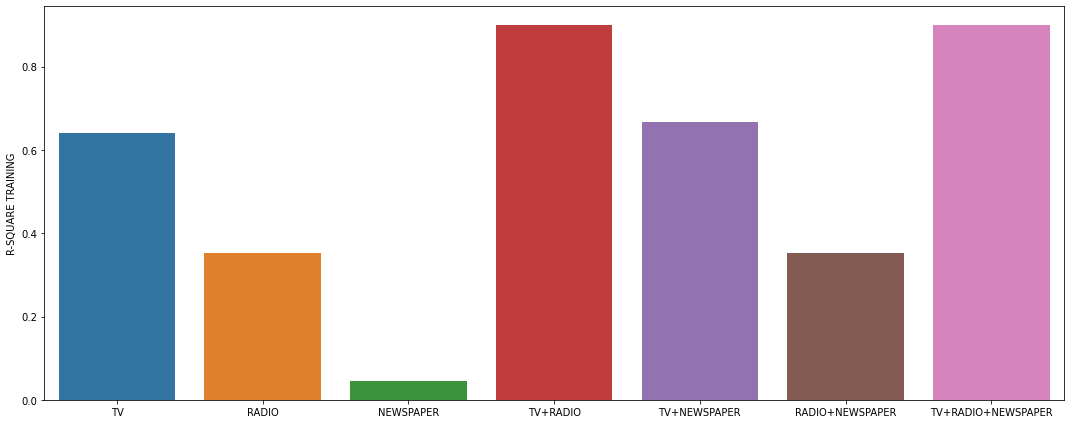

In [90]:
# R-SQUARE TRAINING
fig = plt.figure(figsize=(15,6))
sns.barplot(data=final_data,x=final_data.index,y=final_data['R-SQUARE TRAINING'])
plt.tight_layout()

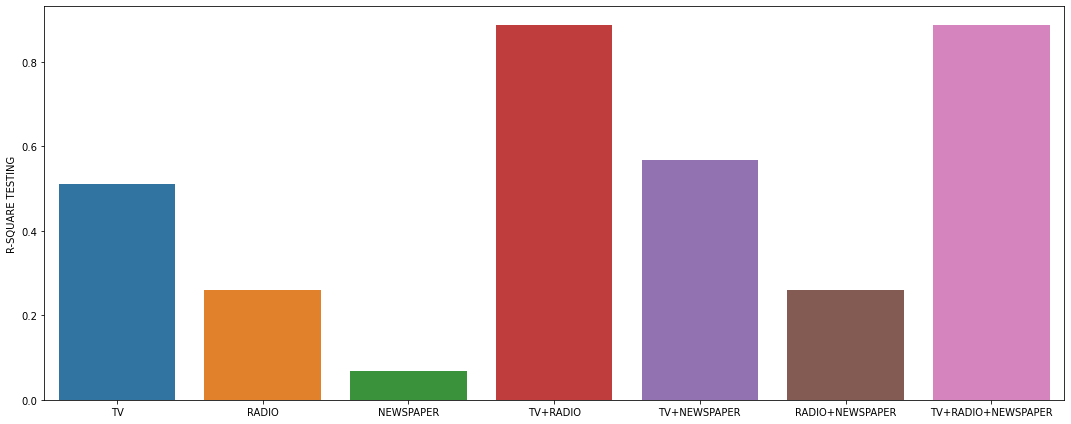

In [91]:
# R-SQUARE TESTING
fig = plt.figure(figsize=(15,6))
sns.barplot(data=final_data,x=final_data.index,y=final_data['R-SQUARE TESTING'])
plt.tight_layout()

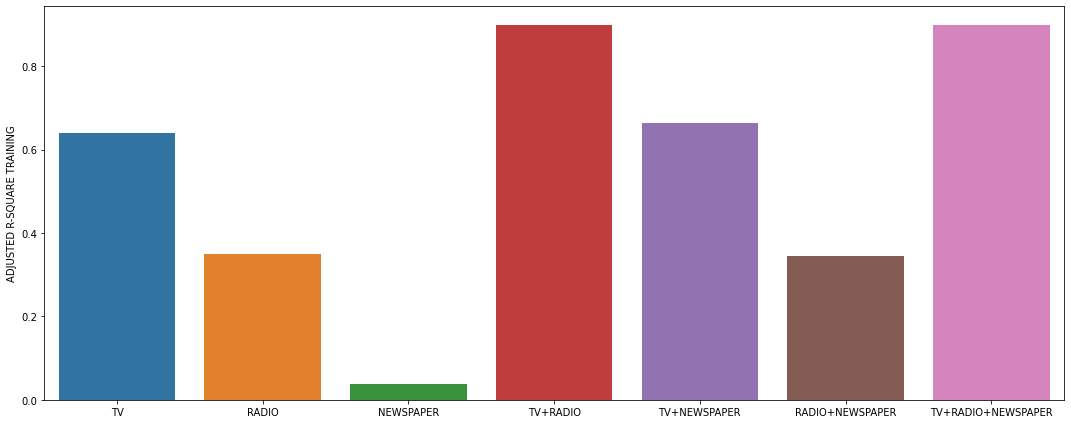

In [95]:
#ADJUSTED R-SQUARE TRAINING
fig = plt.figure(figsize=(15,6))
sns.barplot(data=final_data,x=final_data.index,y=final_data['ADJUSTED R-SQUARE TRAINING'])
plt.tight_layout()


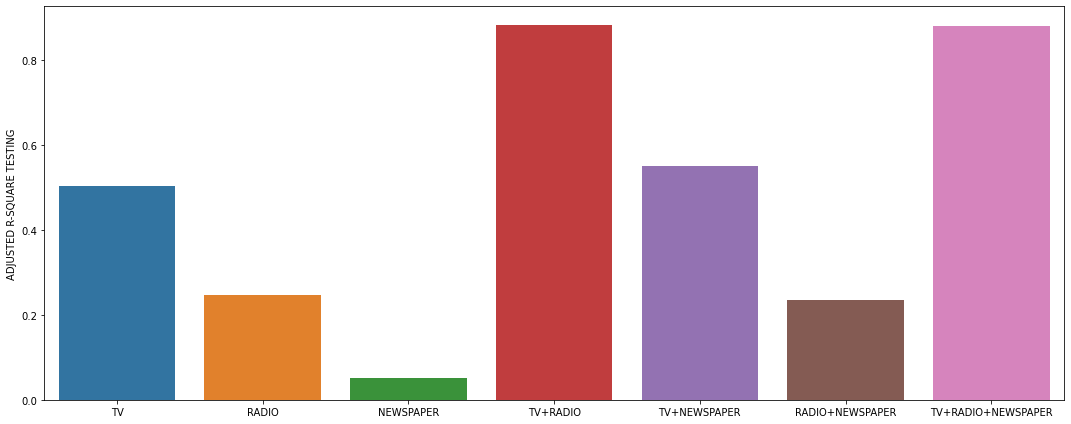

In [96]:
#ADJUSTED R-SQUARE TESTING
fig = plt.figure(figsize=(15,6))
sns.barplot(data=final_data,x=final_data.index,y=final_data['ADJUSTED R-SQUARE TESTING'])
plt.tight_layout()


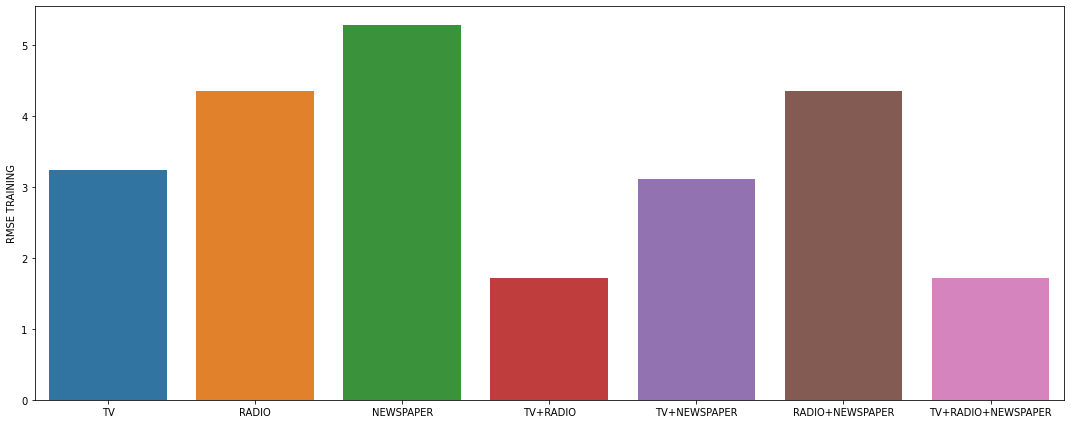

In [97]:
#RMSE TRAINING
fig = plt.figure(figsize=(15,6))
sns.barplot(data=final_data,x=final_data.index,y=final_data['RMSE TRAINING'])
plt.tight_layout()

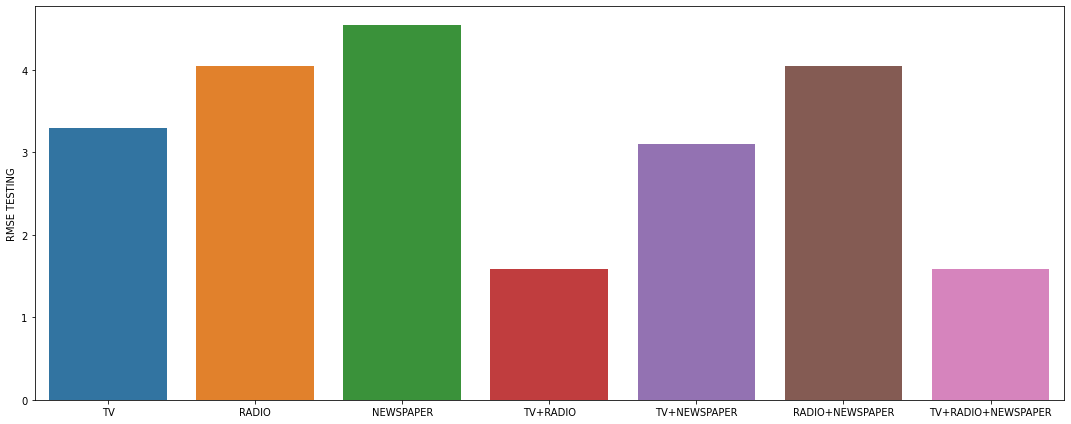

In [98]:
#RMSE TESTING
fig = plt.figure(figsize=(15,6))
sns.barplot(data=final_data,x=final_data.index,y=final_data['RMSE TESTING'])
plt.tight_layout()